# Создание признаков

Проектирование признаков — самый творческий процесс во всём цикле жизни создания модели машинного обучения. 

Он включает в себя несколько этапов: 

1) создание признаков;
2) преобразование признаков;
3) отбор признаков.

В данном модуле мы подробно познакомимся с **каждым** из этапов проектирования признаков. Этот юнит будет посвящён процессу **создания признаков**.

Создание признаков, feature extraction, часто именуемое генерацией признаков, — творческий процесс извлечения новых признаков путём создания признаков из существующего набора данных или путём использования дополнительной информации. 

Проектирование признаков необходимо для улучшения качества будущей модели: в процессе создания признаков появляются новые, возможно, более качественные, чем исходные.

Новые признаки могут быть сконструированы двумя способами: 

1) с помощью внешних источников данных;
2) из существующего набора данных.

**Пример 1**

``В колл-центрах часто используются системы автоматического подбора номеров для дозвона (рекомендация). Если клиент во время прошлого созвона сбросил трубку, то автоматическая система должна снижать рекомендацию этого номера. Клиент вряд ли ответит после того, как бросил трубку.`` 

В выделении этого факта нам поможет создание нового признака «сброс трубки» из информации в существующем датасете. Эта информация может быть получена из уже существующих признаков, например если время звонка составило меньше 10 секунд.

**Пример 2**

``Для определения дефолтности клиента банки делают запрос в БКИ с целью получения дополнительной информации по клиенту. ``

Такая информация о невыплаченных долгах другим организациям может быть решающим фактором в вынесении решения по кредиту. Эту информацию можно получить с использованием внешних источников данных.



Новые признаки можно сконструировать из уже существующего набора данных несколькими способами: 

1) разбор категорий; 
2) разбор даты и времени;
3) разбор числовых признаков;
4) разбор текста.

Рассмотрим эти способы на примере задачи винных обзоров. Вспомним задачу винного сомелье — научиться определять рейтинг (качество) вина по его различным характеристикам. В этом модуле для практических заданий мы будем пользоваться подготовленным и очищенным датасетом.

## РАЗБОР ДАТЫ И ВРЕМЕНИ

In [453]:
import numpy as np 
import pandas as pd 
import plotly.express as px

In [454]:
wine_data = pd.read_csv('data/wine_cleared.csv')
wine_data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


Признаки, обозначающие дату и время, могут содержать много полезной информации. 

Например, в нашем датасете в названии вина можно увидеть год производства вина. Этот признак может оказаться важным для определения рейтинга вина. Однако, пока он заключен в названии вина, модель не сможет его использовать.

Можно выделить год, месяц и часы в отдельные признаки: время суток, времена года и так далее. И если вы считаете, что ваш процесс зависит от времени, посвятите этому этапу как можно больше усилий.

## РАЗБОР ЧИСЛОВЫХ ВЕЛИЧИН

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену 35.363389$ в 35$, избавив данные от лишней информации.

✍️ Создадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:

In [455]:
# для удобства сразу преобразуем признак в int
wine_data['price_round'] = wine_data['price'].round().astype(int)
wine_data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14


Для таких преобразований важен контекст. В контексте вина для сомелье цена в 35$ и 35.363389$ одинакова. Вы делаете округление признака, чтобы модель также не сосредотачивалась на сотых. Это может помочь улучшить предсказание.

``Однако такое преобразование неуместно в ситуациях, когда сотые важны. Например, при предсказании курса лиры стоимость валюты в 6.12 руб. и в 6.84 руб. — абсолютно разные ситуации. ``

Помимо округления для создания новых признаков могут применяться такие популярные операции, как логарифмирование числового признака или извлечение его корня. Это подразумевает создание признаков в наиболее удобной форме для обучения модели. О необходимости таких преобразований вы узнаете далее в юните преобразования данных.

## РАЗБОР ТЕКСТА

Текстовые признаки могут содержать в себе большое количество информации. Например, если бы наша модель умела распознавать текст, то из описания вина мы бы могли понять, какими словами сомелье чаще характеризуют качественное вино. Вы можете воспользоваться методами извлечения слов из текста, чтобы получить новые признаки.

В названии вина вы можете заметить указание года произведения вина. Чтобы узнать, влияет ли год на рейтинг вина, вам необходимо выделить год в отдельный признак.

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.

Регулярные выражения (regexp, или regex) — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

Например, с помощью такого регулярного выражения ``[^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+`` можно найти любой email в тексте.

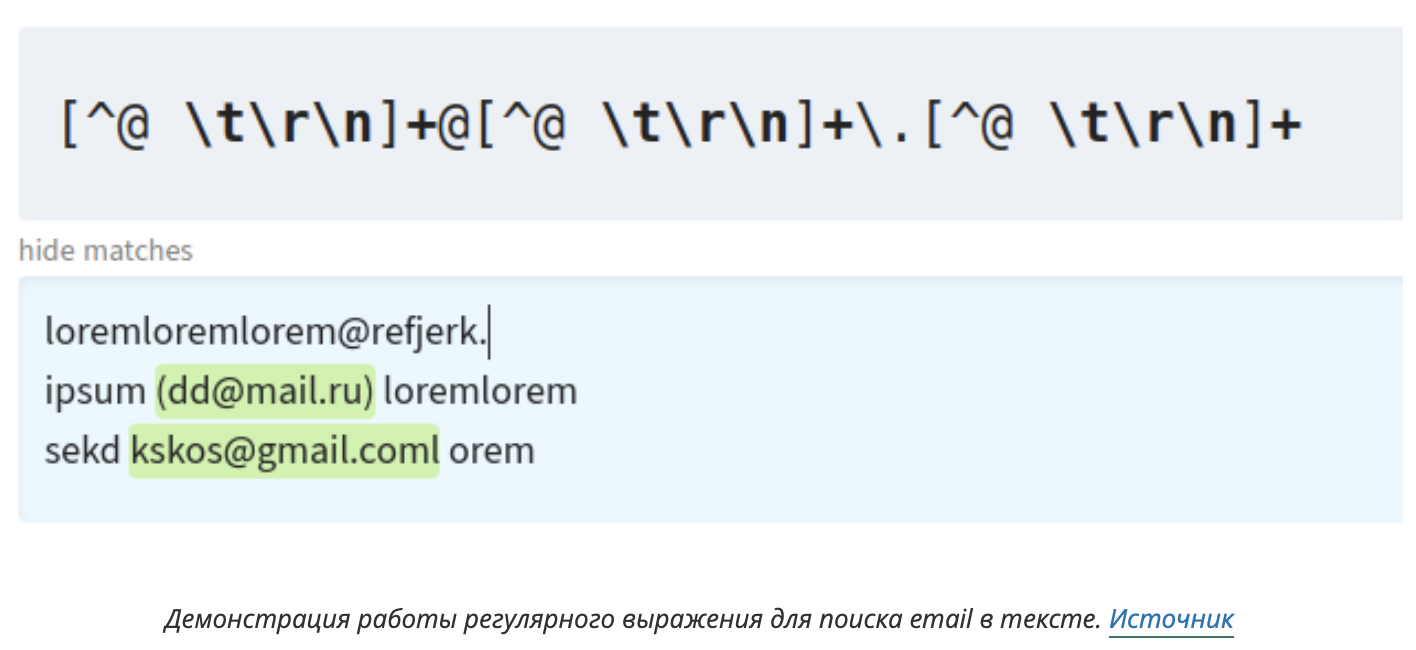

Синтаксис регулярных выражений необычен и содержит различные символы, знаки препинания, математических операций и так далее. Подробнее ознакомиться с синтаксисом регулярных выражений поможет статья Python RegEx: практическое применение регулярок.

Реализация такого механизма существует в pandas в работе со строками. Для того чтобы найти все числа в каждом значении серии, воспользуемся методом str.findall(). Метод возвращает все совпадения с заданным шаблоном в серии pandas. 

✍️ Выполните код для нахождения года вина при помощи регулярного выражения:

In [456]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
wine_data['year'] = wine_data['title'].str.findall(regex).str.get(0)

Разберём регулярное выражение \d{4}:

\d — класс символов, обозначает соответствие цифрам в диапазоне цифр [0-9];
{4} в шаблоне означает искать четыре вхождения символа, указанного ранее. В нашем случае это будут четырехзначные числа.
Таким образом, \d{4} означает поиск четырехзначных чисел в заданной строке.

Проверить, насколько точно работает ваше регулярное выражение, а также найти реализацию популярных регулярных выражений (например, поиска номера телефона), вы сможете на сайте https://ihateregex.io.

Однако при поиске числа методом data['title'].str.findall(regex) результатом выполнения является список найденных цифр. Поэтому необходимо извлечь первый элемент из списка найденных методом str.get(0), где 0 — первый элемент в списке найденных чисел.

In [457]:
wine_data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013


Используя методы работы со строками pandas и регулярные выражения, можно извлечь любую информацию для новых признаков: даты, слова и выражения.

## РАЗБОР КАТЕГОРИЙ

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

In [458]:
wine_data['is_usa'] = wine_data['country'].apply(lambda x: 1 if x == 'US' else 0)
wine_data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1


В наборе данных также есть ещё две страны, которые являются не менее популярными производителями вина.

## Задание 2.1

Выберите из списка две самых популярных (помимо США) страны, производящих вино.

In [459]:
# вычисляем в процентах
wine_data['country'].value_counts(normalize=True)*100

country
US                        41.955846
France                    17.006651
Italy                     15.041414
Spain                      5.115158
Portugal                   4.380793
Chile                      3.442436
Argentina                  2.925147
Austria                    2.574899
Australia                  1.792807
Germany                    1.666564
New Zealand                1.092311
South Africa               1.078456
Israel                     0.388737
Greece                     0.358715
Canada                     0.197832
Hungary                    0.112387
Bulgaria                   0.108538
Romania                    0.092373
Uruguay                    0.083906
Turkey                     0.069280
Slovenia                   0.066970
Georgia                    0.066201
England                    0.056963
Croatia                    0.056194
Mexico                     0.053884
Moldova                    0.045417
Brazil                     0.040028
Lebanon             

## Задание 2.2

Создайте бинарные признаки is_france, is_italy наподобие признака is_usa.

In [460]:
wine_data['is_france'] = wine_data['country'].apply(lambda x: 1 if x == 'France' else 0)
wine_data['is_italy'] = wine_data['country'].apply(lambda x: 1 if x == 'Italy' else 0)
wine_data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1,0,0


In [461]:
print('Сумма вин сделанных во Франции сотавляет:',wine_data['is_france'].sum(),'а в Италии:',wine_data['is_italy'].sum())

Сумма вин сделанных во Франции сотавляет: 22093 а в Италии: 19540


Вы можете углубиться в разбор категориальных признаков — создать бинарный признак для каждого значения страны. Можно не делать это вручную: существуют специальные способы кодирования. Об особенностях этого подхода мы поговорим в юните Кодирование данных.

Также вы можете создавать некие бизнес-правила, гипотезы. О правилах их построения вы узнаете далее в материалах, посвящённых статистическим гипотезам. 

Попробуем вывести правило в определении качества вина: старые вина лучше молодых. В нашем датасете 40 % вин старше 2010 года. 

### Задание 2.3

Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.



In [462]:
wine_data['year'] = pd.to_datetime(wine_data['year'], errors='coerce')
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129971 non-null  int64         
 1   country                129908 non-null  object        
 2   description            129971 non-null  object        
 3   designation            129971 non-null  object        
 4   points                 129971 non-null  int64         
 5   price                  129971 non-null  float64       
 6   province               129908 non-null  object        
 7   region_1               129971 non-null  object        
 8   taster_name            129971 non-null  object        
 9   taster_twitter_handle  129971 non-null  object        
 10  title                  129971 non-null  object        
 11  variety                129970 non-null  object        
 12  winery                 129971 non-null  obje

In [463]:
wine_data['old_wine'] = wine_data['year'].apply(lambda x: 1 if x.year < 2010 else 0)
wine_data['old_wine'].sum()

39765

Итак, разбор категориальных признаков может быть использован для выделения самых популярных, уникальных категорий в отдельный признак.

Таким образом, разбор категорий, даты и времени, числовых признаков, текста применяются для создания новых, более сильных признаков для обучения.

### Задание 2.7 (Самопроверка)

Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.

*Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.*

In [464]:
pattern = r'\(.*?\)' # регулярное выражение для нахождения слов в скобках
wine_data['locality'] = wine_data['title'].str.findall(pattern).str.get(0)

In [465]:
wine_data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,(Etna)
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,(Douro)
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,(Willamette Valley)


***

# Создание признаков. Внешние источники данных

В машинном обучении часто используют внешние источники данных для создания признаков. Это может быть необходимо для получения совершенно новой информации, которая может быть важнее исходных признаков.

``Внешние источники данных`` — дополнительные источники информации, использующиеся для обогащения датасета. Существует два типа внешних источников данных — открытые и закрытые.

Открытые источники доступны всем пользователям интернета. Их предоставляют такие источники, как Федеральная служба государственной статистики, Федеральная налоговая служба, Центральный банк, Википедия и так далее.

**Пример**

``Для определения платежеспособности клиента банки часто используют данные из Федеральной службы государственной статистики, чтобы получить информацию о занятости клиента, размере оплаты труда для конкретного региона, в котором проживает клиент. Эта информация может оказаться важной в определении платёжеспособности клиента.``

Компания, занимающаяся построением предсказательной модели, может запросить данные в качестве услуги (data as a service) у компании-провайдера данных. Это случай обогащения датасета закрытыми данными. Источниками закрытых данных являются сотовые операторы, БКИ, Госуслуги, ФССП (Федеральная служба судебных приставов) и так далее.

**Пример**

``Коллекторская компания по договорённости с Федеральной службой судебных приставов дополнительно получает информацию об исполнительных производствах и других судебных процессах по своим клиентам. Это помогает обеспечивать более качественные взыскания.``

Для получения информации из внешних источников данных специалисты по данным могут скачивать информацию с сайтов, парсить их и взаимодействовать с внешними сервисами по API.

Например, на сайте Федеральной службы государственной статистики (Росстат) вы можете скачать данные об общем приросте населения областей РФ в формате .XLSX, .CSV, .HTML, .DOCX. Вы уже работали с файлами различных форматов в модуле PYTHON-16. Как выгружать данные из файлов разных форматов.

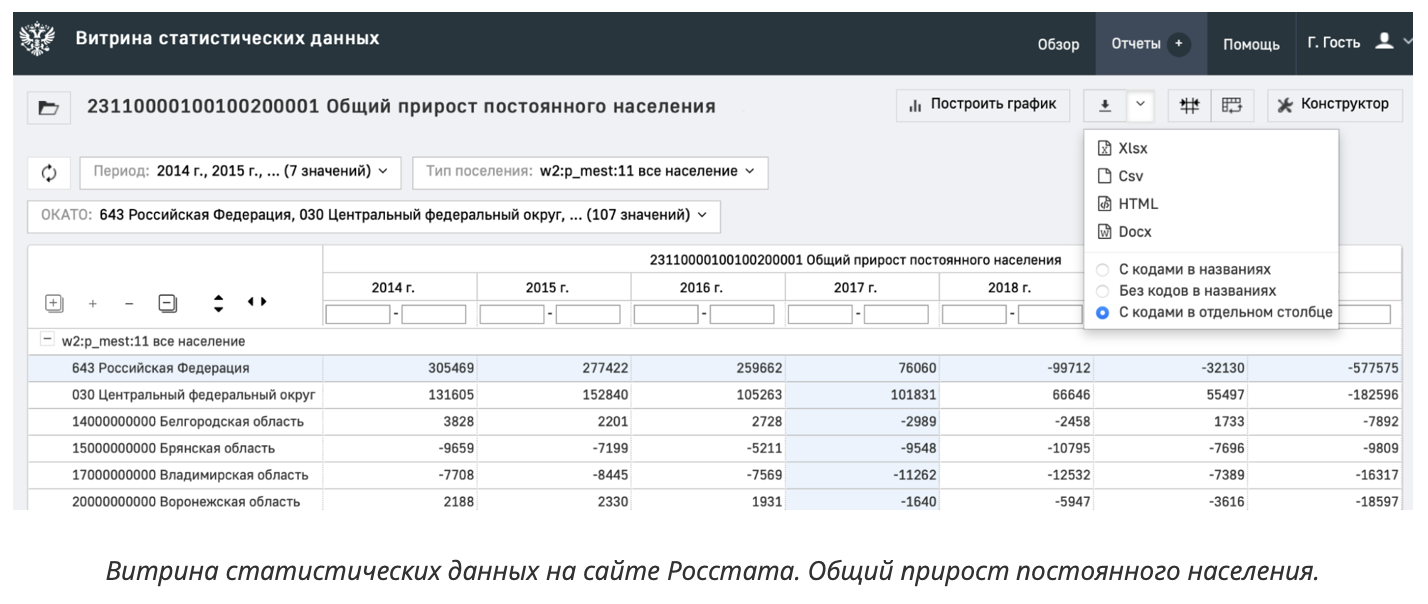

Также специалисты по данным используют API или парсинг для получения дополнительной информации. Вы уже научились парсингу сайтов и работе с API в модуле PYTHON-17. Как получать данные из веб-источников и API.

Дата-инженеры могут запрашивать у сотового оператора по API информацию о принадлежности номера телефона определённому клиенту. Такую информация можно использовать, чтобы выяснить, скрывает ли человек своё настоящее имя.

Когда данные получить необходимо, а API у источника данных нет, дата-инженеры прибегают к парсингу. 

Например, вы хотите в целях обучения создать модель, которая бы предсказывала стоимость автомобиля по заданным характеристикам. Из данных у вас есть только марка автомобиля и его стоимость. Произведя парсинг сайта auto.ru, вы сможете получить дополнительную информацию о марках автомобиля: тип кузова, габариты, расход топлива, — и понять, из каких параметров складывается цена на автомобиль.

**Внешняя информация бывает общая и профильная.**

``Общая внешняя информация`` — это различные общие географические, экологические, статистические и другие данные. 

* географические: население страны, площадь страны, столица страны и так далее.
* экологические: среднегодовая температура местности, текущее время года, уровень загрязнения воздуха и так далее.
* статистические: доходы населения, половозрастной состав, уровень безработицы и так далее.

Они находятся в открытых источниках: Росстат, Википедия и так далее.

Для доступа к ним применяется парсинг, скачивание и работа с файлами файлов, реже — работа по API.

``Профильная внешняя информация`` — информация, связанная со сферой бизнеса, проблему которого необходимо решить. 

Например, при прогнозировании рейтинга ресторана мы можем использовать ссылки на сайт TripAdvisor для парсинга и получения информации о ресторанах. При рекомендации фильмов в приложении мы можем пользоваться информацией с «Кинопоиска» о фильмах. Также это могут быть запросы в сервисы — запрос в Dadata.ru для проверки действительности адреса. 

Для доступа к такой информации часто применяются запросы по API, парсинг, работа с файлами.

Давайте попробуем использовать внешние источники данных для получения информации к нашему набору данных. 

## РАБОТА С ФАЙЛАМИ

In [466]:
country_population = pd.read_csv('data/country_population.csv', sep=';')
country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


Прочитав файл, мы получили привычный нам датафрейм с полями country — название страны, population — население страны

### Задание 3.1

Каково население Италии согласно датасету country_population? Ответ вводите без пробелов и запятых.

In [471]:
country_population.loc[country_population['country'] == 'Italy']

,country,population
24,Italy,"59,097,904"
